In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import random
import math
from scipy.signal import convolve2d

Saving ball_pool_balls-900x900.jpg to ball_pool_balls-900x900 (7).jpg


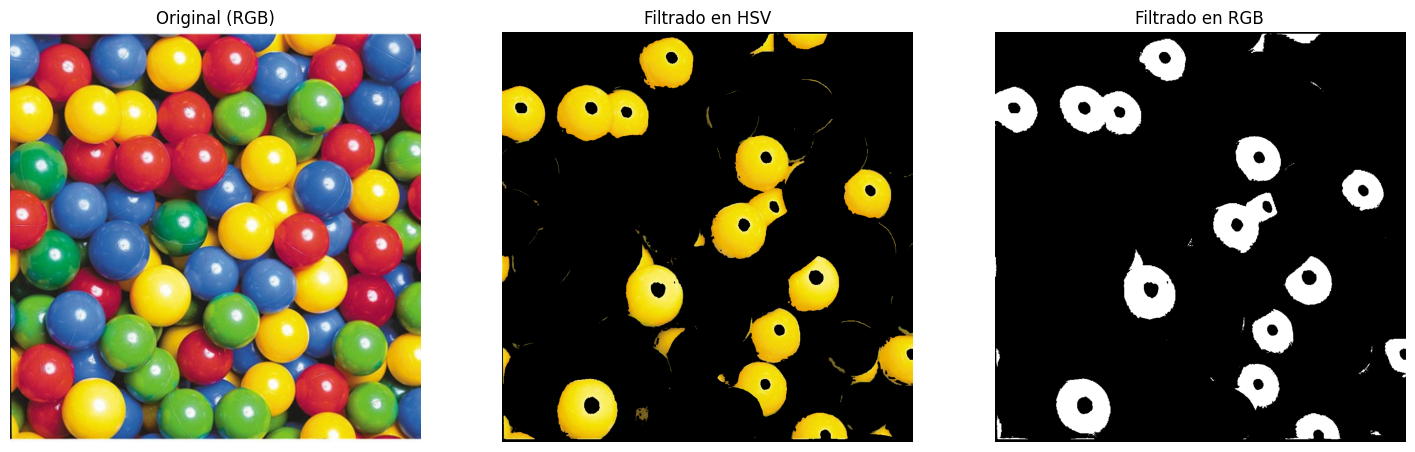

In [ ]:


# Subir una imagen desde tu equipo
uploaded = files.upload()

# Leer la imagen
for file_name in uploaded.keys():
    imagen = cv2.imread(file_name)
    break

# ========== FILTRO EN HSV ==========
hsv = cv2.cvtColor(imagen, cv2.COLOR_BGR2HSV)

# Rango para amarillo en HSV
bajo_amarillo_hsv = np.array([20, 100, 100])
alto_amarillo_hsv = np.array([30, 255, 255])

mascara_hsv = cv2.inRange(hsv, bajo_amarillo_hsv, alto_amarillo_hsv)
resultado_hsv = cv2.bitwise_and(imagen, imagen, mask=mascara_hsv)

# ========== FILTRO EN RGB ==========
# Convertir imagen de BGR a RGB (para trabajar correctamente)
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

# Rango para amarillo en RGB
bajo_amarillo_rgb = np.array([200, 200, 0])
alto_amarillo_rgb = np.array([255, 255, 150])

mascara_rgb = cv2.inRange(imagen_rgb, bajo_amarillo_rgb, alto_amarillo_rgb)
resultado_rgb = cv2.bitwise_and(imagen_rgb, imagen_rgb, mask=mascara_rgb)

# ========== MOSTRAR RESULTADOS ==========
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.title("Original (RGB)")
plt.imshow(imagen_rgb)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Filtrado en HSV")
plt.imshow(cv2.cvtColor(resultado_hsv, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Filtrado en RGB")
plt.imshow(mascara_rgb, cmap = 'gray')
plt.axis('off')

plt.show()


Saving images.jpeg to images (23).jpeg


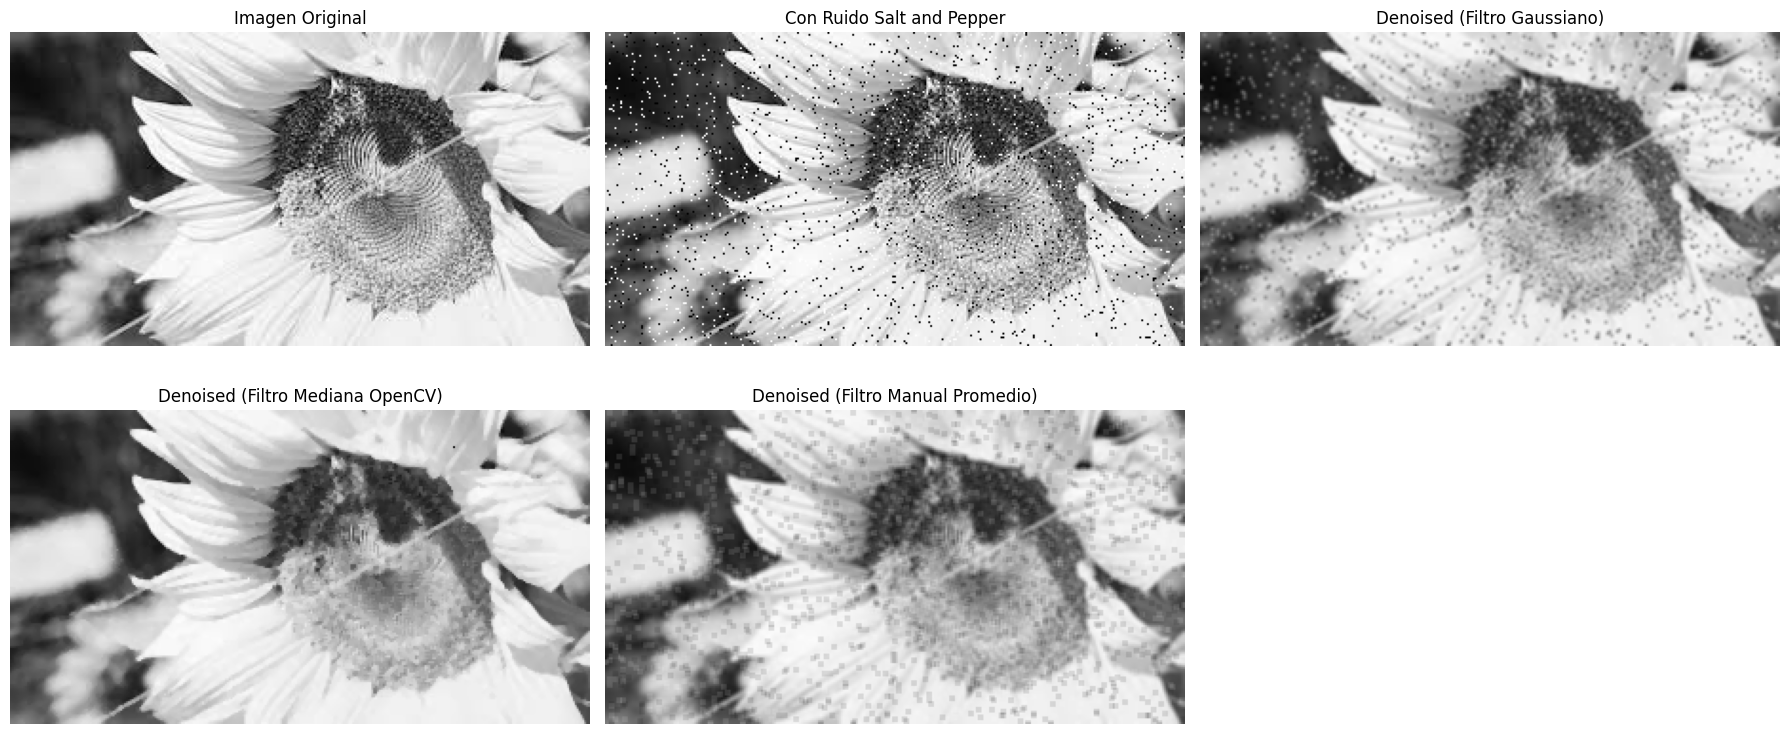

In [ ]:


# Subir una imagen desde tu equipo
uploaded = files.upload()

# Leer la imagen
for file_name in uploaded.keys():
    imagen = cv2.imread(file_name)
    break

imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)


# Función para añadir ruido "salt and pepper"
def salt_and_pepper_noise(imagen, amount=0.05):
    row, col, _ = imagen.shape
    num_noise = int(amount * row * col)

    for _ in range(num_noise):
        i = random.randint(0, row - 1)
        j = random.randint(0, col - 1)

        if random.random() < 0.5:
            imagen[i, j] = [255, 255, 255]
        else:
            imagen[i, j] = [0, 0, 0]

    return imagen

# Aplicar ruido
noisy_image = salt_and_pepper_noise(imagen_rgb.copy(), amount=0.05)

# Filtro promedio (media)
AV_filter = np.ones((3, 3)) / 9

# Filtro gaussiano (versión simple, ya normalizada)
GAUSSIAN_filter = np.array([[1, 2, 1],
                            [2, 4, 2],
                            [1, 2, 1]]) / 16

# Aplicar convolución a cada canal por separado con el filtro gaussiano
def apply_filter(image, kernel):
    filtered = np.zeros_like(image)
    for i in range(3):  # R, G, B
        filtered[:, :, i] = convolve2d(image[:, :, i], kernel, mode='same', boundary='symm')
    return filtered

# Aplicar el filtro gaussiano
denoised_image = apply_filter(noisy_image, AV_filter)
denoised_image_gaus = apply_filter(noisy_image, GAUSSIAN_filter)
denoised_median = cv2.medianBlur(noisy_image, 3)

#plot
plt.figure(figsize=(18, 8))  # Ajusta el tamaño para dos filas

plt.subplot(2, 3, 1)
plt.title("Imagen Original")
plt.imshow(imagen_rgb)
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title("Con Ruido Salt and Pepper")
plt.imshow(noisy_image)
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title("Denoised (Filtro Gaussiano)")
plt.imshow(denoised_image_gaus)
plt.axis('off')

plt.subplot(2, 3, 4)
plt.title("Denoised (Filtro Mediana OpenCV)")
plt.imshow(denoised_median)
plt.axis('off')

plt.subplot(2, 3, 5)
plt.title("Denoised (Filtro Manual Promedio)")
plt.imshow(denoised_image)
plt.axis('off')

plt.tight_layout()
plt.show()


Saving sub_samplig.jpg to sub_samplig (9).jpg


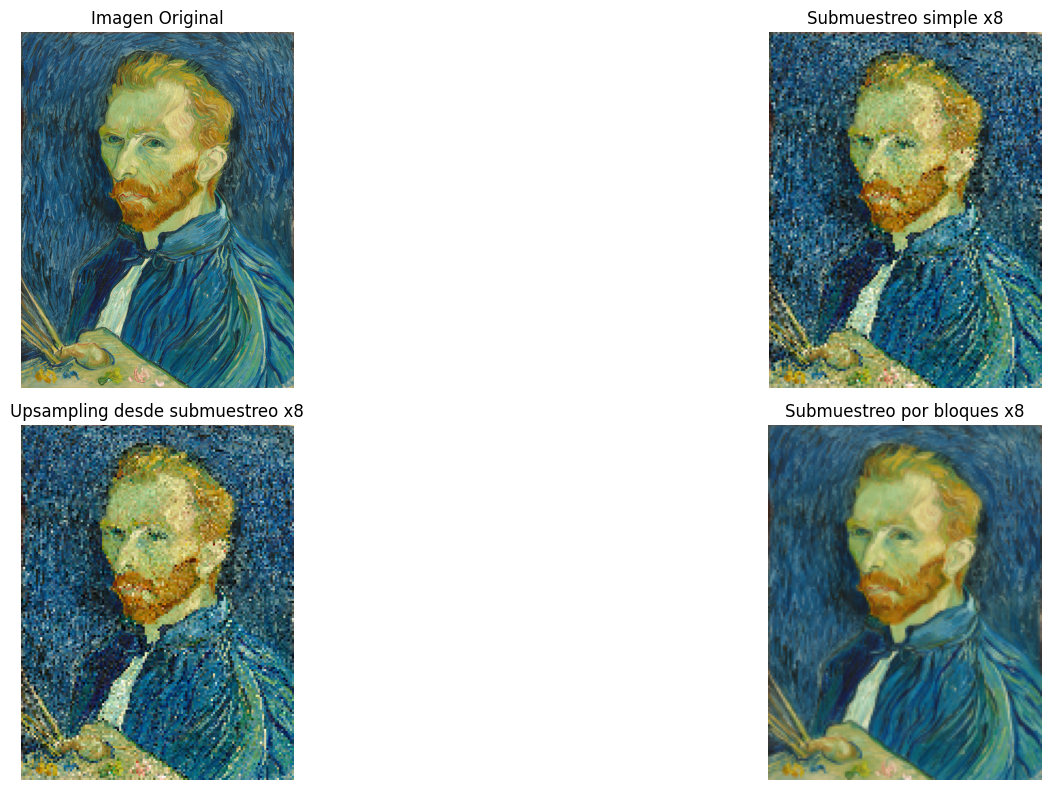

In [ ]:

# Subir imagen
uploaded = files.upload()

# Leer imagen subida
for file_name in uploaded.keys():
    imagen = cv2.imread(file_name)
    break

# Convertir BGR a RGB para visualización
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

# Función para submuestreo y sobremuestreo
def resize_image(image, factor=100, mode='sub'):
    """
    Redimensiona una imagen mediante submuestreo o sobremuestreo.

    Parámetros:
    - image: imagen (array de NumPy, RGB o BGR).
    - factor: entero > 1 que define la escala.
    - mode: 'sub' para subsampling, 'up' para upsampling (interpolación).

    Retorna:
    - Imagen transformada.
    """
    if factor < 1:
        raise ValueError("El factor debe ser >= 1")

    if mode == 'sub':
        # Submuestreo
        return image[::factor, ::factor]

    elif mode == 'up':
        # Sobremuestreo
        height, width = image.shape[:2]
        new_size = (width * factor, height * factor)
        return cv2.resize(image, new_size, interpolation=cv2.INTER_NEAREST)

    else:
        raise ValueError("El modo debe ser 'sub' o 'up'")

import numpy as np

def block_average_subsampling(image, factor=2):
    """
    Submuestreo por promedio de bloques (factor x factor).
    Reduce el tamaño de la imagen promediando bloques de píxeles.

    Parámetros:
    - image: imagen RGB como array de NumPy.
    - factor: entero > 1. Tamaño del bloque para promediado.

    Retorna:
    - Imagen submuestreada (promediada por bloques).
    """
    h, w, c = image.shape
    new_h = h // factor
    new_w = w // factor

    # Recorta la imagen si no es divisible exactamente
    image = image[:new_h * factor, :new_w * factor]

    # Redimensiona con reshape y calcula la media
    reshaped = image.reshape(new_h, factor, new_w, factor, c)
    subsampled = reshaped.mean(axis=(1, 3)).astype(np.uint8)

    return subsampled


# Aplicar submuestreo y luego upsampling
factor = 8  # Puedes cambiarlo a 3, 4, etc.
subsampled = resize_image(imagen_rgb, factor=factor, mode='sub')
upsampled = resize_image(subsampled, factor=factor, mode='up')
subsampled_block = block_average_subsampling(imagen_rgb, factor=factor)

# Mostrar imágenes incluyendo el método de promediado por bloques
plt.figure(figsize=(20, 8))

plt.subplot(2, 2, 1)
plt.title("Imagen Original")
plt.imshow(imagen_rgb)
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title(f"Submuestreo simple x{factor}")
plt.imshow(subsampled)
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title(f"Upsampling desde submuestreo x{factor}")
plt.imshow(upsampled)
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title(f"Submuestreo por bloques x{factor}")
plt.imshow(subsampled_block)
plt.axis('off')

plt.tight_layout()
plt.show()

